In [9]:
import os
import sys
import gzip
import gpxpy
import shutil
import fitdecode
import gpxpy.gpx
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

import parse_fit
import parse_gpx
import parse_tcx

pd.options.display.max_columns = 100

%load_ext autoreload
%autoreload 2

In [65]:
list_of_fit_files = ["\\".join((".\\data", v)) for v in os.listdir(".\\data")
                     if ".gpx" not in v and ".gz" not in v]
list_of_gpx_files = ["\\".join((".\\data", v)) for v in os.listdir(".\\data")
                     if ".gpx" in v]

In [70]:
list_of_fit_files.index(".\\data\\12328861617.fit")

84

In [105]:
-138964832 / ((2**32) / 360)

-11.64789766073227

In [111]:
import json

bbb = open("11005915940.json")
bbb = json.load(bbb)

In [149]:
pd.DataFrame(bbb[10]["fields"]).set_index("name")[["value"]].T.reset_index(drop = True)

name,timestamp,position_lat,position_long,distance,time_from_course,speed,distance,compressed_speed_distance,heart_rate,enhanced_altitude,altitude,enhanced_speed,speed,power,grade,cadence,resistance,cycle_length,temperature
0,2023-11-25T10:56:23+00:00,-11.647899,166.94056,0.00555,None,None,None,None,87,1.6,1.6,12.1464,12.1464,147,None,32,None,None,None


In [154]:
fit_file_points[fit_file_points["Activity Name"] == "Zwift - The Pretzel in Watopia"].shape

(10414, 116)

In [94]:
fit_file_laps[fit_file_laps["FileName"] == "12328861617.fit"]["Activity Name"]

928    Afternoon Ride - All4Cycling
929    Afternoon Ride - All4Cycling
930    Afternoon Ride - All4Cycling
931    Afternoon Ride - All4Cycling
932    Afternoon Ride - All4Cycling
933    Afternoon Ride - All4Cycling
Name: Activity Name, dtype: object

In [153]:
fn = "2024-06-15-15-18-57.fit"
#os.system("fitjson --pretty -o {} .\\data\\{}".format(fn.replace("fit", "json"), fn))
os.system("fitjson --pretty -o {} {}".format(fn.replace("fit", "json"), fn))

0

In [79]:
aaa = parse_fit.get_dataframes(list_of_fit_files[84])[1]

In [155]:
aaa["power"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
10484   NaN
10485   NaN
10486   NaN
10487   NaN
10488   NaN
Name: power, Length: 10489, dtype: float64

In [75]:
aaa["slope"].notna().sum()

0

In [ ]:
##########################################
### GET TO DATAFRAME PER EACH FIT FILE ###
##########################################
list_of_dfs_fit_points = []
list_of_dfs_fit_laps = []
for file in tqdm(list_of_fit_files):
    d_ = parse_fit.get_dataframes(file)
    list_of_dfs_fit_laps.append(d_[0])
    list_of_dfs_fit_points.append(d_[1])

fit_file_laps = pd.concat(list_of_dfs_fit_laps, ignore_index = True)
fit_file_points = pd.concat(list_of_dfs_fit_points, ignore_index = True)

https://towardsdatascience.com/parsing-fitness-tracker-data-with-python-a59e7dc17418

In [12]:
# SAVE FILES TO AVOID RECOMPUTING EACH TIME
fit_file_laps = pd.read_parquet(".\\data\\fit_file_laps.parquet")
fit_file_points = pd.read_parquet(".\\data\\fit_file_points.parquet")

In [99]:
fit_file_points["Activity Name"].unique()

array(['Day 1: Verso Asti', 'Day 2: Monferrato ', 'Morning Ride',
       'Unico giro sotto i 100 km con salite da Milano?',
       'Affezionato alla Brianza + giro turistico in centro',
       'Long time no see Brianza', 'IL LOMBARDIA 2023',
       'Se fori fori nel punto più lontano da casa',
       'Treni da e per Milano', 'In paradiso day 1', 'A spasso day 2',
       'Prima Zwiftata', 'Evening Ride', 'Night Ride',
       'Zwift - Rolling Roads in Innsbruck', 'Zwift - FTP Test in France',
       'Zwift - Quick 2 by 2 in London',
       'Zwift - 2h in Z2 on Tempus Fugit in Richmond',
       'Zwift - Zwift Academy: Workout 1 | Explosive 30s in Yorkshire',
       'Zwift - Ocean Lava Cliffside Loop in Watopia',
       'Zwift - The Mega Pretzel in Watopia',
       'Zwift - Foundation in Paris',
       'Zwift - 2h in Z2 in Makuri Islands',
       'Zwift - 3h in Z2 in Yorkshire', 'Zwift - 2h in Z2 in London',
       'Zwift - TT#2 Core Workout in New York',
       'Zwift - High Cadence Day 6

In [17]:
np.sin(np.pi/2)

1.0

In [36]:
def compute_power(weight, bike_wgt, speed, slope):
    
    # 1) rolling resistance
    C_rr = np.random.uniform(0.0025, 0.005) # coefficient of rolling resistance
    m = weight + bike_wgt # total mass
    g = 9.81

    P_rr = C_rr * m * speed * g

    # 2) Aerodynamic drag
    rho = 1.225 # air density
    C_d = 0.88 # drag coefficient
    A = 0.5 # frontal area

    P_aero = 0.5 * rho * C_d * A * np.power(speed, 3)

    # 3) Gradient resistance
    slope_rad = slope * (np.pi/180)
    P_gr = m * g * speed * np.sin(slope_rad)

    eta = 0.95 # drivetrain efficiency

    P = (P_rr + P_aero + P_gr) / eta

    return max(P, 0)

In [156]:
fit_file_points[fit_file_points["Activity Name"].str.contains("Mega")]#.isnull().sum()[:25]

,FileName,latitude,longitude,lap,altitude,cadence,calories,compressed_speed_distance,cycle_length,distance,enhanced_altitude,enhanced_speed,grade,heart_rate,position_lat,position_long,power,resistance,speed,temperature,time_from_course,timestamp,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,Activity Private Note,Activity Gear,Filename,Athlete Weight,Bike Weight,Elapsed Time.1,Moving Time,Distance.1,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Max Grade,Average Grade,Average Positive Grade,Average Negative Grade,...,Type,Start Time,Weighted Average Power,Power Count,Prefer Perceived Exertion,Perceived Relative Effort,Commute.1,Total Weight Lifted,From Upload,Grade Adjusted Distance,Weather Observation Time,Weather Condition,Weather Temperature,Apparent Temperature,Dewpoint,Humidity,Weather Pressure,Wind Speed,Wind Gust,Wind Bearing,Precipitation Intensity,Sunrise Time,Sunset Time,Moon Phase,Bike,Gear,Precipitation Probability,Precipitation Type,Cloud Cover,Weather Visibility,UV Index,Weather Ozone,Jump Count,Total Grit,Average Flow,Flagged,Average Elapsed Speed,Dirt Distance,Newly Explored Distance,Newly Explored Dirt Distance,Activity Count,Total Steps,Carbon Saved,Pool Length,Training Load,Intensity,Average Grade Adjusted Pace,Timer Time,Total Cycles,Media
196942,11005915940.fit,-11.647898,166.940496,1,1.6,15.0,NaN,None,None,0.30,1.6,1.115,NaN,88.0,-138964832,1991677696,177.0,NaN,NaN,NaN,None,2023-11-25 10:56:21+00:00,10278852415,"Nov 25, 2023, 10:56:21 AM",Zwift - The Mega Pretzel in Watopia,Virtual Ride,None,8965,45.02,163.0,54.0,False,NaN,Scott Addict RC (virtual),11005915940.fit,NaN,9.8,8965.0,8185.0,45026.089844,17.510157,5.501050,734.0,0.0,-6.4,373.799988,15.572855,0.019544,NaN,NaN,...,NaN,NaN,110.0,8584.0,0.0,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13940951.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.02243,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,media/7b50ada7-0a2c-4df7-86c0-f87138020e56.jpg...
196943,11005915940.fit,-11.647898,166.940528,1,1.6,29.0,NaN,None,None,2.47,1.6,2.625,NaN,87.0,-138964832,1991678080,150.0,NaN,NaN,NaN,None,2023-11-25 10:56:22+00:00,10278852415,"Nov 25, 2023, 10:56:21 AM",Zwift - The Mega Pretzel in Watopia,Virtual Ride,None,8965,45.02,163.0,54.0,False,NaN,Scott Addict RC (virtual),11005915940.fit,NaN,9.8,8965.0,8185.0,45026.089844,17.510157,5.501050,734.0,0.0,-6.4,373.799988,15.572855,0.019544,NaN,NaN,...,NaN,NaN,110.0,8584.0,0.0,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13940951.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.02243,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,media/7b50ada7-0a2c-4df7-86c0-f87138020e56.jpg...
196944,11005915940.fit,-11.647899,166.940560,1,1.6,32.0,NaN,None,None,5.55,1.6,3.374,NaN,87.0,-138964848,1991678464,147.0,NaN,NaN,NaN,None,2023-11-25 10:56:23+00:00,10278852415,"Nov 25, 2023, 10:56:21 AM",Zwift - The Mega Pretzel in Watopia,Virtual Ride,None,8965,45.02,163.0,54.0,False,NaN,Scott Addict RC (virtual),11005915940.fit,NaN,9.8,8965.0,8185.0,45026.089844,17.510157,5.501050,734.0,0.0,-6.4,373.799988,15.572855,0.019544,NaN,NaN,...,NaN,NaN,110.0,8584.0,0.0,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13940951.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.02243,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,media/7b50ada7-0a2c-4df7-86c0-f87138020e56.jpg...
196945,11005915940.fit,-11.647904,166.940582,1,1.6,56.0,NaN,None,None,9.35,1.6,3.908,NaN,87.0,-138964912,1991678720,97.0,NaN,NaN,NaN,None,2023-11-25 10:56:24+00:00,10278852415,"Nov 25, 2023, 10:56:21 AM",Zwift - The Mega Pretzel in Watopia,Virtual Ride,None,8965,45.02,163.0,54.0,False,NaN,Scott Addict RC (virtual),11005915940.fit,NaN,9.8,8965.0,8185.0,45026.089844,17.510157,5.501050,734.0,0.0,-6.4,373.799988,15.572855,0.019544,NaN,NaN,...,NaN,NaN,110.0,8584.0,0.0,NaN,0.0,

In [66]:
fit_file_points[fit_file_points["grade"].notna()].sort_values("timestamp")[["Activity Name", "Filename"]].drop_duplicates().head()

,Activity Name,Filename
640503,Back on the road,9293279157.fit
647007,Caldo e vento sugli Euganei🔥🌬,9323764869.fit
660135,Long Ride di Marzo,9364127943.fit
679297,Azzardando ghiaini a Teolo,9380658757.fit
686969,Ultima in Veneto,9399007407.fit


In [157]:
x = fit_file_points[fit_file_points["FileName"] == "11005915940.fit"].copy().sort_values("timestamp", ignore_index = True)

<Axes: >

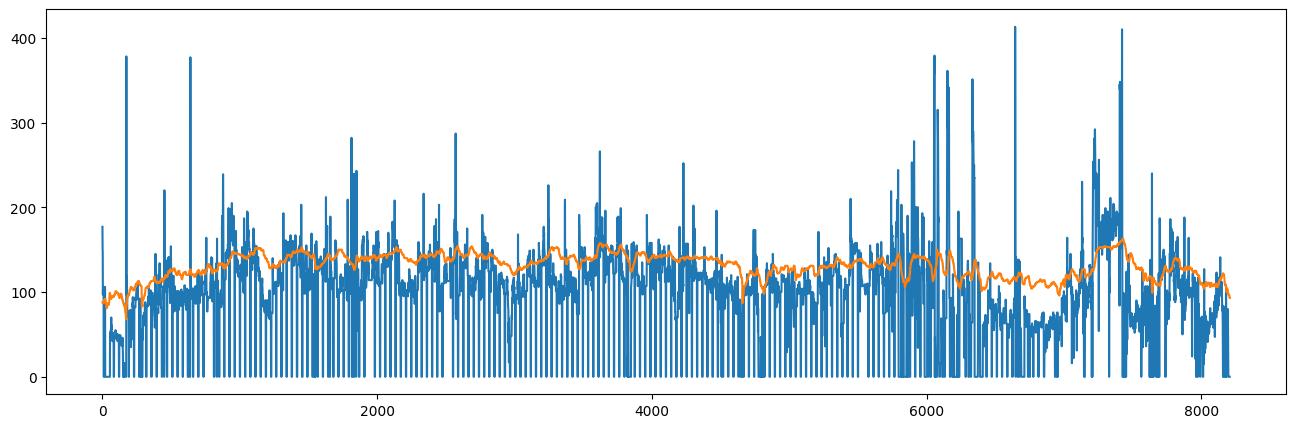

In [160]:
plt.figure(figsize = (16, 5))
x["power"].plot()
x["heart_rate"].plot()

In [161]:
x[["power", "heart_rate"]].corr()

# https://medium.com/geekculture/time-series-forecast-in-python-5c4c61e1c2c2

# TIMESERIES ANALYSIS TO FIND RELATION BETWEEN POWER AND HEART RATE ?

,power,heart_rate
power,1.000000,0.417644
heart_rate,0.417644,1.000000


In [171]:
x["power"].values.reshape(1, -1)

array([[177., 150., 147., ...,   0.,   0.,   0.]])

In [173]:
np.dot(np.dot(np.linalg.inv(np.dot(x["heart_rate"].values.reshape(1, -1),
                            x["heart_rate"].values.reshape(-1, 1))
                            ), x["heart_rate"].values.reshape(1, -1)),
                            x["power"].values.reshape(-1, 1))

array([[0.77808267]])

173     0.0
172     0.0
170     0.0
171     0.0
169     0.0
       ... 
7427    0.0
7428    0.0
7429    0.0
7430    0.0
7431    0.0
Name: power, Length: 8207, dtype: float64

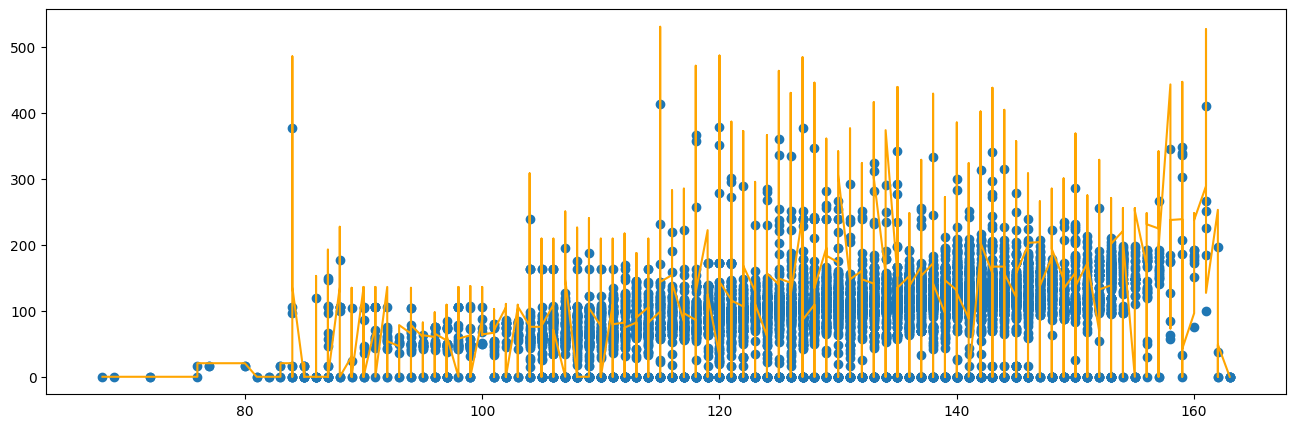

In [185]:
x["heart_rate"]*0.77

plt.figure(figsize = (16, 5))
plt.scatter(x["heart_rate"], x["power"])
plt.plot(x.sort_values("heart_rate")["heart_rate"],
         x[["power", "heart_rate"]].sort_values("heart_rate")["power"]/0.77808267, color = "orange")

In [200]:
attempt = x[["power", "heart_rate"]].copy()
attempt["estimated_power"] = attempt["heart_rate"]*0.77808267 + 10

In [201]:
attempt[1000:1050]

,power,heart_rate,estimated_power
1000,0.0,144.0,122.043904
1001,0.0,144.0,122.043904
1002,0.0,144.0,122.043904
1003,122.0,144.0,122.043904
1004,122.0,144.0,122.043904
1005,122.0,144.0,122.043904
1006,122.0,144.0,122.043904
1007,122.0,144.0,122.043904
1008,122.0,143.0,121.265822
1009,122.0,143.0,121.265822


<Axes: >

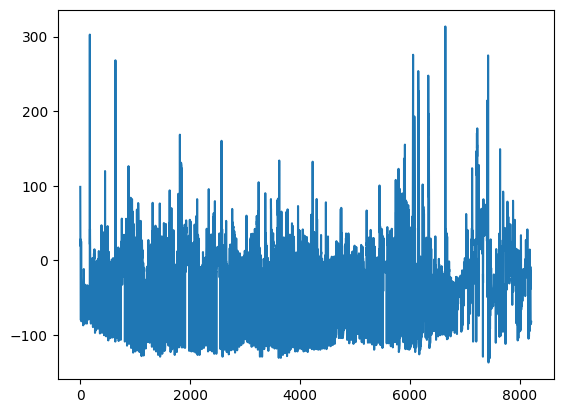

In [203]:
(attempt["power"] - attempt["estimated_power"]).plot()

In [97]:
y = aaa.apply(lambda row: compute_power(64, 9.8, row["speed"], row["current_slope"]), axis = 1).fillna(0)

In [98]:
y.describe()

count    10489.000000
mean       147.564405
std         99.821141
min          0.000000
25%         74.561785
50%        148.902631
75%        205.973337
max        777.941560
dtype: float64

In [96]:
y.min()

0.0

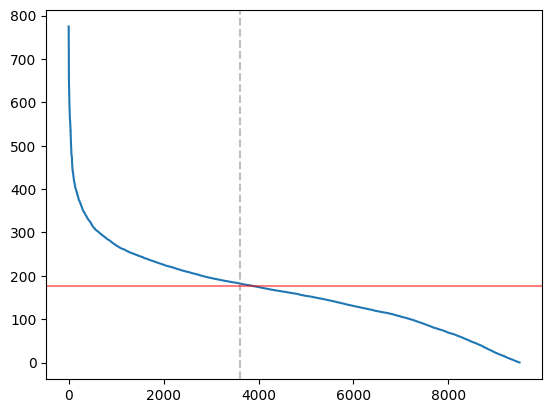

In [91]:
plt.plot(sorted(y[y > 0].tolist())[::-1])
plt.axvline(3600, color = "grey", ls = "--", alpha = .5)
plt.axhline(176, color = "red", alpha = .5)